<a target="_blank" href="https://colab.research.google.com/github/phitterio/phitter-kernel/blob/main/utilities/tutorials/working_distribution.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


In [180]:
import plotly.graph_objects as go
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy
import sys
import os

In [181]:
mpl.style.use("ggplot")

In [182]:
if os.getenv("COLAB_RELEASE_TAG"):
   !pip install phitter --quiet
else:
   sys.path.append("../../")

In [183]:
import phitter

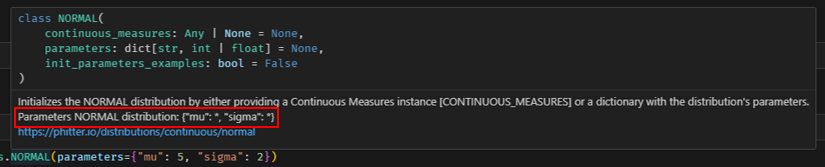


In [184]:
distribution = phitter.continuous.NORMAL(parameters={"mu": 5, "sigma": 2})

In [193]:
distribution.cdf(3.56446)

0.2364495569443788

In [191]:
distribution.pdf(3.56446)

0.1541725883965463

In [195]:
distribution.ppf(0.6344)

5.6870594036440725

In [192]:
distribution.mean

5

In [185]:
data = distribution.sample(1000)

In [186]:
densities_frequencies, bin_edges = numpy.histogram(data, density=True)
central_values = (bin_edges[:-1] + bin_edges[1:]) / 2

In [187]:
x_plot = numpy.linspace(numpy.min(data), numpy.max(data), 1000)
y_plot = distribution.pdf(x_plot)

In [190]:
fig = go.Figure()
fig.add_trace(go.Bar(x=central_values, y=densities_frequencies, marker_color="gray", name="Data"))
# fig.add_trace(go.Histogram(x=data, marker_color="gray", histnorm="probability density", name="Hist"))
fig.add_trace(go.Scatter(x=x_plot, y=y_plot, mode="lines", line=dict(color="red", width=3), name="PDF"))

fig.update_layout(
    height=400,
    width=600,
    title="HISTOGRAM",
    xaxis_title="Values",
    yaxis_title="Frequencies",
    template="ggplot2",
    legend=dict(orientation="v", yanchor="auto", y=1, xanchor="left", font=dict(size=10)),
    bargap=0.06,
)

fig.show()

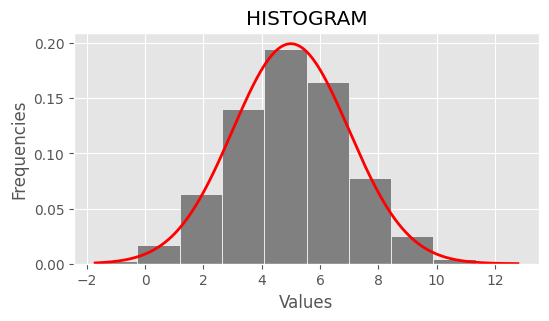

In [189]:
plt.figure(figsize=(6, 3))
plt.hist(data, density=True, ec="white", color="gray")
plt.title("HISTOGRAM")
plt.xlabel("Values")
plt.ylabel("Frequencies")
plt.plot(x_plot, y_plot, label=f"PDF", color="red", linewidth=2)
plt.show()